```
Name: Andrea Fox
Date: 5-16-2021
Course: DSC650 - T301 Big Data
Assignment: Assignment 10
```

## Assignment 10.1
```
In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.
```

### 10.1.a
```
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.
```

In [1]:
def tokenize(sentence):
    #create punctuations variable and loop to remove punctuation from
    #https://www.programiz.com/python-programming/examples/remove-punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    no_punc = ""
    for char in sentence:
        if char not in punctuations:
            no_punc = no_punc + char
    #change case to lower (Sam Loyd called it out in 10.1 chat)
    no_punc = no_punc.lower()
    #create variable to split sentence into separate tokens
    words = no_punc.split()
    return words

sentence = 'All code is guilty, until proven innocent.'
tokens = tokenize(sentence)
print(tokens)

['all', 'code', 'is', 'guilty', 'until', 'proven', 'innocent']


### 10.1.b
```
Implement an `ngram` function that splits tokens into N-grams.
```

In [9]:
def ngram(tokens, n):
    #create ngram variable using zip. Found here: https://albertauyeung.github.io/2018/06/03/generating-ngrams.html
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

n = 4
sentence = 'All code is guilty, until proven innocent.'
ngram(tokens, n)

['all code is guilty',
 'code is guilty until',
 'is guilty until proven',
 'guilty until proven innocent']

### 10.1.c
```
Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.
```

In [12]:
#load helper library
import numpy as np

#used listing 6.1 from book page - 182 for guidance
def one_hot_encode(tokens, num_words):
    token_index = {}
    for sample in samples:
        for word in sample.split():
            if word not in token_index:
                token_index[word] = len(token_index) + 1
    results = np.zeros(shape = (len(samples), num_words, max(token_index.values()) + 1))
    for i, sample in enumerate(samples):
        for j, word in list(enumerate(sample.split()))[ :num_words]:
            index = token_index.get(word)
            results[i, j, index] = 1
    return results

#made the assumption that num_words was the same as max_length 
num_words = 10
samples = ['I have a lovely bunch of coconuts.', 'Sally sold seashells by the seashore.']
one_hot_encode(tokens, num_words)

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        

## 10.2
```
Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.
```

In [51]:
#load libraries
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

#create directories
current_dir = Path(os.getcwd()).absolute()
imdb_dir = Path('/home/jovyan/dsc650/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

In [45]:
#Listing 6.8 - Processing the labels of the raw IMDB data
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [46]:
#Listing 6.9 - Tokenizing the text of the raw IMDB data
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [47]:
#Listing 6.10 - Parsing the GloVe word-embeddings file
#Opened website listed in book and downloaded glove.6B.100 then moved to assignment10 folder
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [48]:
#Listing 6.11 - Preparing the GloVe word-embeddings matrix
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
#Listing 6.12 - Model Definition
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Listing 6.13 - Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

#Listing 6.14 - Training and evaluation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 120ms/step - loss: 1.8968 - acc: 0.4993 - val_loss: 0.7131 - val_acc: 0.5024
Epoch 2/10
7/7 [==============================] - 1s 102ms/step - loss: 0.5673 - acc: 0.7323 - val_loss: 0.8341 - val_acc: 0.4997
Epoch 3/10
7/7 [==============================] - 1s 98ms/step - loss: 0.5884 - acc: 0.7163 - val_loss: 0.6973 - val_acc: 0.5428
Epoch 4/10
7/7 [==============================] - 1s 100ms/step - loss: 0.4380 - acc: 0.8772 - val_loss: 0.7660 - val_acc: 0.5079
Epoch 5/10
7/7 [==============================] - 1s 99ms/step - loss: 0.2808 - acc: 0.9770 - val_loss: 0.7366 - val_acc: 0.5494
Epoch 6/10
7/7 [==============================] - 1s 93ms/step - loss: 0.2493 - acc: 0.9546 - val_loss: 0.7362 - val_acc: 0.5567
Epoch 7/10
7/7 [==============================] - 1s 99ms/step - loss: 0.1945 - acc: 0.9424 - val_loss: 0.7138 - val_acc: 0.5722
Epoch 8/10
7/7 [==============================] - 1s 98ms/step - loss: 0.0985 - acc: 1.0000 - 

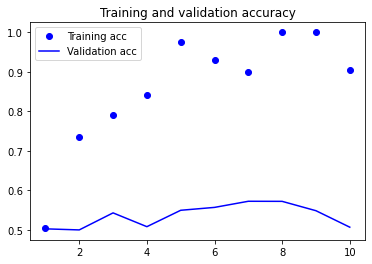

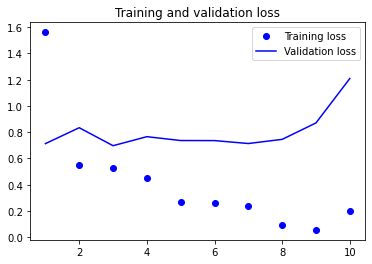

In [52]:
#Listing 6.15 - Plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
#Listing 6.16 - Training the same model without pretrained word embeddings
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 120ms/step - loss: 0.6947 - acc: 0.4768 - val_loss: 0.6923 - val_acc: 0.5206
Epoch 2/10
7/7 [==============================] - 1s 107ms/step - loss: 0.5252 - acc: 0.9963 - val_loss: 0.6937 

In [54]:
#Listing 6.17 - Tokenizing the data of the test set
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [55]:
#Listing 6.18 - Evaluating the model on the test set
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.2161 - acc: 0.5061


[1.2160563468933105, 0.5061200261116028]

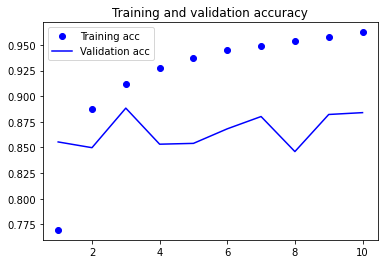

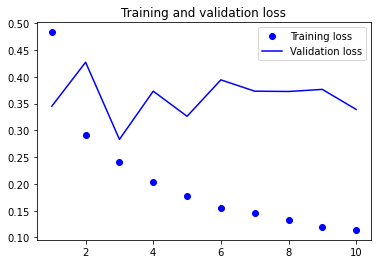

In [69]:
#Plot metrics
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 10.3
```
Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.
```

In [67]:
#load libraries
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt

In [64]:
#Listing 6.22 - Preparing the IMDB data
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [66]:
#Listing 6.27 - Using the LSTM layer in Keras
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 65s 405ms/step - loss: 0.5842 - acc: 0.6786 - val_loss: 0.3451 - val_acc: 0.8554
Epoch 2/10
157/157 [==============================] - 61s 389ms/step - loss: 0.2969 - acc: 0.8868 - val_loss: 0.4273 - val_acc: 0.8498
Epoch 3/10
157/157 [==============================] - 61s 386ms/step - loss: 0.2437 - acc: 0.9110 - val_loss: 0.2832 - val_acc: 0.8884
Epoch 4/10
157/157 [==============================] - 61s 389ms/step - loss: 0.1961 - acc: 0.9318 - val_loss: 0.3733 - val_acc: 0.8532
Epoch 5/10
157/157 [==============================] - 60s 384ms/step - loss: 0.1720 - acc: 0.9409 - val_loss: 0.3264 - val_acc: 0.8540
Epoch 6/10
157/157 [==============================] - 60s 382ms/step - loss: 0.1488 - acc: 0.9495 - val_loss: 0.3944 - val_acc: 0.8682
Epoch 7/10
157/157 [==============================] - 61s 386ms/step - loss: 0.1351 - acc: 0.9531 - val_loss: 0.3732 - val_acc: 0.8802
Epoch 8/10
157/157 [==============================] - 6

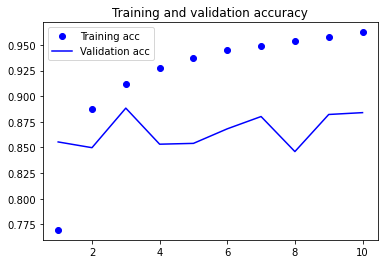

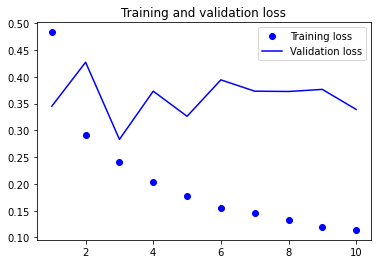

In [68]:
#Plotting metrics
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 10.4
```
Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.
```

In [73]:
#load libraries
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence

In [72]:
#Listing 6.45 - Preparing the IMDB data
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [74]:
#Listing 6.46 - Training and evaluating a simple 1D convnet on the IMDB data
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
___________________________________________

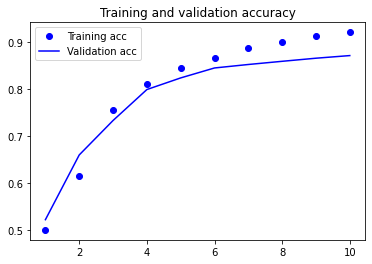

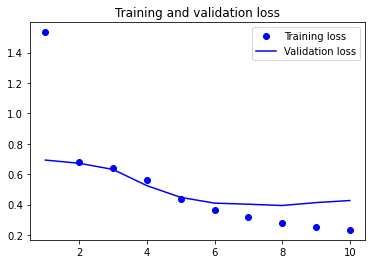

In [75]:
#Plotting the data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()